# Testy

## Test dla jedej firmy

[*********************100%***********************]  1 of 1 completed


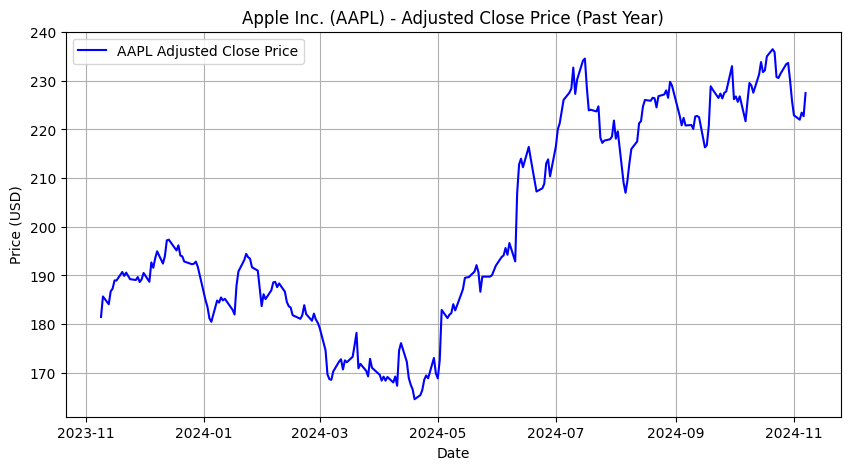

In [29]:
import yfinance as yf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the stock ticker symbol and date range
ticker = "AAPL"
end_date = datetime.today()
start_date = end_date - timedelta(days=365)

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Plot the Adjusted Close price
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Adj Close'], label="AAPL Adjusted Close Price", color='blue')
plt.title("Apple Inc. (AAPL) - Adjusted Close Price (Past Year)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()


## Ze skalowaniem

[*********************100%***********************]  1 of 1 completed


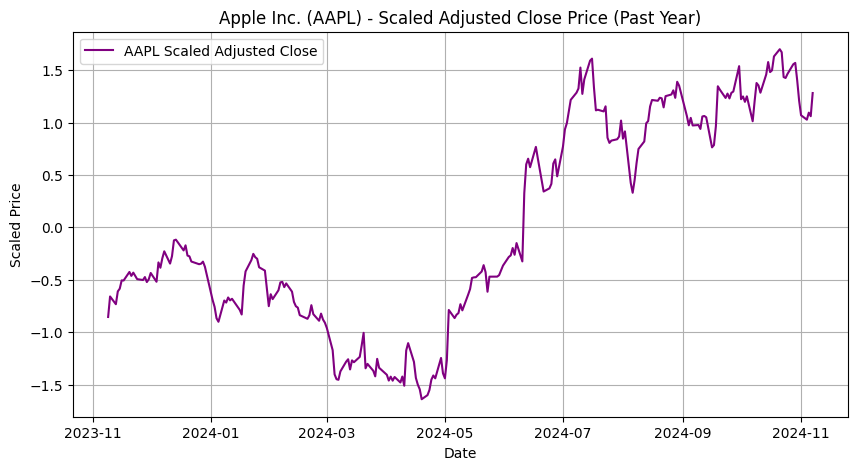

In [28]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the stock ticker symbol and date range
ticker = "AAPL"
end_date = datetime.today()
start_date = end_date - timedelta(days=365)

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Extract the Adjusted Close prices and reshape for scaling
adj_close = data[['Adj Close']]

# Initialize the scaler and scale the data
scaler = StandardScaler()
scaled_adj_close = scaler.fit_transform(adj_close)

# Convert the scaled data back to a DataFrame for plotting
scaled_adj_close_df = pd.DataFrame(scaled_adj_close, index=adj_close.index, columns=['Scaled Adj Close'])

# Plot the scaled adjusted close prices
plt.figure(figsize=(10, 5))
plt.plot(scaled_adj_close_df.index, scaled_adj_close_df['Scaled Adj Close'], label="AAPL Scaled Adjusted Close", color='purple')
plt.title("Apple Inc. (AAPL) - Scaled Adjusted Close Price (Past Year)")
plt.xlabel("Date")
plt.ylabel("Scaled Price")
plt.legend()
plt.grid()
plt.show()


## Wszystkie tickery firm z SP500

In [9]:
import pandas as pd

# Scrape the list of S&P 500 tickers from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
table = pd.read_html(url)
sp500_table = table[0]  # The first table on the page contains the S&P 500 list

# Extract the ticker symbols
tickers = sp500_table['Symbol'].tolist()

# Display the list of tickers
print("List of S&P 500 tickers:")
print(tickers)


List of S&P 500 tickers:
['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMTM', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BWA', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX

In [11]:
import pandas as pd
import yfinance as yf
from tqdm import tqdm
from datetime import datetime, timedelta

# Get the list of S&P 500 tickers
def get_sp500_tickers():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    table = pd.read_html(url)
    sp500_table = table[0]  # First table is the S&P 500 list
    tickers = sp500_table['Symbol'].tolist()
    return tickers

# Define the date range (past year)
end_date = datetime.today()
start_date = end_date - timedelta(days=365)

# Get tickers and prepare DataFrame
tickers = get_sp500_tickers()
all_data = pd.DataFrame()

# Download data for each ticker
for ticker in tqdm(tickers):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if not data.empty:
            all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")

# Save the data to CSV
all_data.to_csv('sp500_prices.csv')
print("Data for all S&P 500 stocks saved to 'sp500_prices.csv'")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%***********************]  1 of 1 completed
C:\Users\Jakub\AppData\Local\Temp\ipykernel_11704\4154063834.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data[ticker] = data['Adj Close']  # Save Adjusted Close price
[*********************100%**********

Data for all S&P 500 stocks saved to 'sp500_prices.csv'


Pobrane szeregi z ostatniego roku 

In [12]:
all_data

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-09 00:00:00+00:00,73.343582,70.235695,91.719635,133.171875,309.248688,577.739990,113.489998,15.012646,79.140381,107.184708,...,28.888186,33.214104,235.773727,89.646072,56.520496,95.718018,122.290672,202.520004,103.487679,168.956635
2023-11-10 00:00:00+00:00,74.231377,71.662651,92.131416,133.702484,314.632172,597.219971,118.589996,15.079881,79.707771,107.910950,...,29.276598,33.252239,237.803177,84.543221,57.001934,97.339348,123.506615,206.179993,104.779778,167.659485
2023-11-13 00:00:00+00:00,74.135399,72.213737,93.915810,133.750732,310.636383,590.340027,116.790001,14.926200,79.658859,106.906151,...,28.965868,33.299904,241.089920,83.603752,56.106468,97.388779,122.879028,202.610001,105.177345,167.174301
2023-11-14 00:00:00+00:00,75.958992,74.811783,95.180573,133.191177,315.419495,604.330017,119.879997,16.270905,80.455345,111.034767,...,30.713720,33.643108,239.911850,86.155167,58.061089,100.048157,125.055969,215.660004,107.413689,170.956802
2023-11-15 00:00:00+00:00,77.438660,73.808006,96.082573,132.747421,320.350220,595.309998,118.000000,16.338139,79.078697,113.014503,...,30.801117,33.728905,239.020859,86.491402,57.858891,99.099083,124.163628,216.960007,109.828926,172.907501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01 00:00:00+00:00,127.220001,75.400002,118.599998,203.550003,345.670013,482.799988,141.860001,14.710000,104.709999,136.869995,...,31.180000,51.560001,299.299988,95.680000,66.690002,119.459999,132.339996,384.640015,107.269997,181.949997
2024-11-04 00:00:00+00:00,125.849998,75.139999,117.650002,200.470001,343.899994,481.350006,140.710007,15.230000,104.510002,139.649994,...,31.709999,52.139999,302.820007,95.650002,65.820000,120.839996,132.759995,377.019989,108.410004,175.179993
2024-11-05 00:00:00+00:00,126.519997,75.919998,117.730003,201.679993,345.489990,486.420013,141.660004,15.510000,105.559998,140.410004,...,31.870001,53.049999,307.920013,86.720001,66.330002,122.260002,134.720001,379.690002,108.919998,175.270004


In [34]:
from dtaidistance import dtw
import numpy as np

# Select two tickers from the tickers list
ticker_1 = tickers[0]  # Select the first ticker (e.g., 'AAPL')
ticker_2 = tickers[1]  # Select the second ticker (e.g., 'MSFT')

# Extract the first 10 adjusted close prices for both tickers
series_1 = all_data[ticker_1].iloc[:10].values
series_2 = all_data[ticker_2].iloc[:10].values

# Calculate the exact DTW distance
distance = dtw.distance(series_1, series_2)

print(f"Exact DTW distance between {ticker_1} and {ticker_2} for the first 10 days: {distance}")


Exact DTW distance between MMM and AOS for the first 10 days: 6.920278161466317


In [39]:
from dtaidistance import dtw
import numpy as np
import pandas as pd

# Assuming tickers list contains the ticker symbols
# Select the first 10 tickers
tickers_subset = tickers[:50]

# Create an empty list to store the DTW distances
dtw_matrix = np.zeros((len(tickers_subset), len(tickers_subset)))

# Loop through all pairs of tickers
for i, ticker_1 in enumerate(tickers_subset):
    for j, ticker_2 in enumerate(tickers_subset):
        # Extract the adjusted close prices for both tickers (first 10 values)
        series_1 = all_data[ticker_1].iloc[:10].values
        series_2 = all_data[ticker_2].iloc[:10].values

        # Calculate the DTW distance using dtaidistance
        distance = dtw.distance(series_1, series_2)
        
        # Fill the DTW matrix
        dtw_matrix[i, j] = distance

# Convert the matrix into a DataFrame for easier readability
dtw_df = pd.DataFrame(dtw_matrix, index=tickers_subset, columns=tickers_subset)

# Print the DTW distance matrix
print(dtw_df)


               MMM          AOS          ABT         ABBV         ACN  \
MMM       0.000000     6.920278    64.611278   181.251549  769.317564   
AOS       6.920278     0.000000    72.396301   189.070587  777.145550   
ABT      64.611278    72.396301     0.000000   117.222715  704.915005   
ABBV    181.251549   189.070587   117.222715     0.000000  588.308805   
ACN     769.317564   777.145550   704.915005   588.308805    0.000000   
ADBE   1661.071606  1668.880993  1596.664439  1480.006428  891.827042   
AMD     135.774979   143.573062    71.590862    46.109025  633.623713   
AES     190.478579   182.658021   254.913874   371.634554  959.783807   
AFL      12.672110    20.351197    52.905661   169.075017  757.280415   
A       118.261588   126.013160    53.510243    66.229500  651.950597   
APD     596.616555   604.447641   532.247385   415.573506  172.882833   
ABNB    153.908811   161.705680    89.588921    31.640063  615.702597   
AKAM    113.037700   120.846941    49.115672    68.

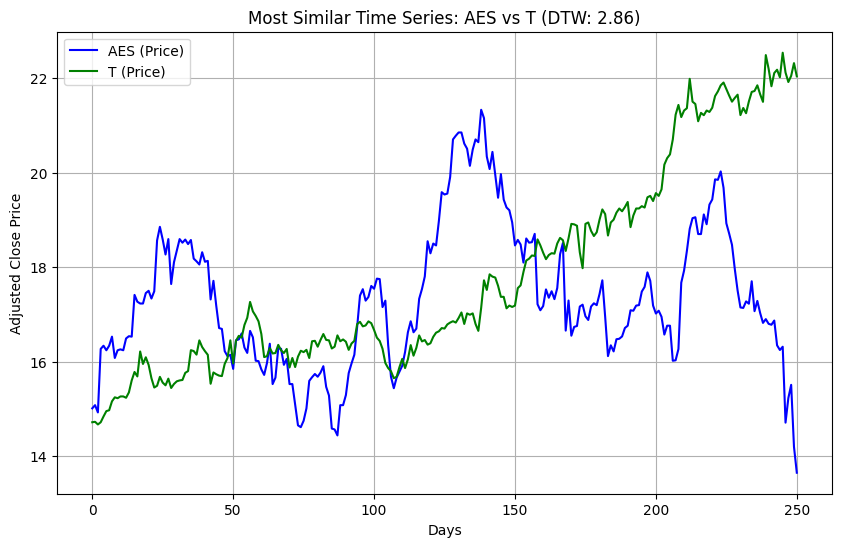

In [40]:
import matplotlib.pyplot as plt

# Find the indices of the two most similar time series (excluding the diagonal)
min_distance = float('inf')
most_similar_pair = (None, None)

for i in range(len(tickers_subset)):
    for j in range(i+1, len(tickers_subset)):  # Only check upper triangle (excluding diagonal)
        if dtw_matrix[i, j] < min_distance:
            min_distance = dtw_matrix[i, j]
            most_similar_pair = (tickers_subset[i], tickers_subset[j])

# Get the two most similar tickers
ticker_1, ticker_2 = most_similar_pair

# Extract the first 10 adjusted close prices for both tickers
series_1 = all_data[ticker_1].iloc[:].values
series_2 = all_data[ticker_2].iloc[:].values

# Plot the two most similar time series
plt.figure(figsize=(10, 6))
plt.plot(series_1, label=f'{ticker_1} (Price)', color='blue')
plt.plot(series_2, label=f'{ticker_2} (Price)', color='green')
plt.title(f"Most Similar Time Series: {ticker_1} vs {ticker_2} (DTW: {min_distance:.2f})")
plt.xlabel('Days')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()


## Normalizacja

Tutaj trzeba najpierw znormalizować wszystkie dane a potem robić algorytm bo się liczy długo (niektóre kolumny chyba są do wyrzucenia/poprawy)

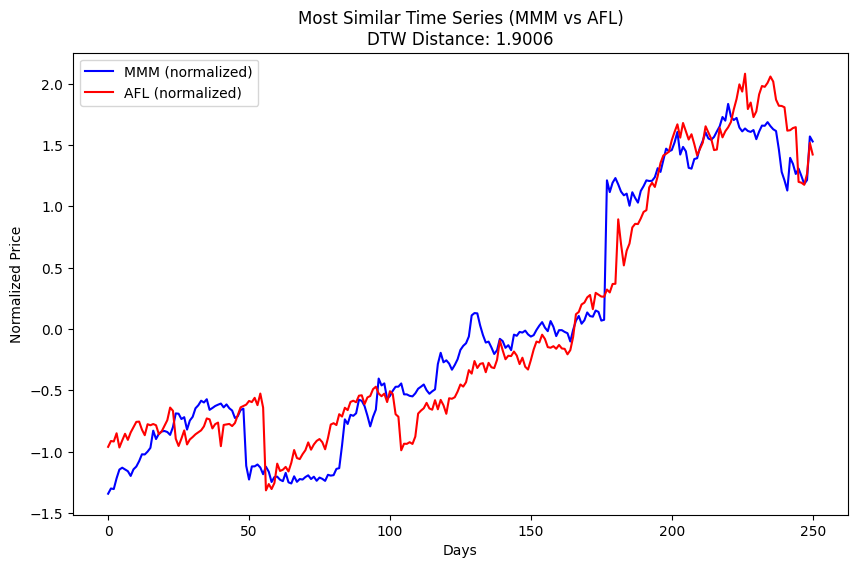

The most similar pair is: MMM and AFL with DTW distance: 1.9006


In [48]:
from dtaidistance import dtw
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler for normalization
scaler = StandardScaler()

# Create an empty list to store the DTW distances between the first 10 time series
dtw_distances = []

# Calculate DTW distance for each pair of time series
for i, ticker1 in enumerate(tickers[:20]):
    for j, ticker2 in enumerate(tickers[:20]):
        if i < j:  # Only calculate once per pair (avoid duplicate calculations)
            # Get the data for the pair of tickers
            time_series1 = all_data[ticker1].iloc[:].values
            time_series2 = all_data[ticker2].iloc[:].values
            
            # Normalize the data for both time series before calculating DTW
            normalized_series1 = scaler.fit_transform(time_series1.reshape(-1, 1)).flatten()
            normalized_series2 = scaler.fit_transform(time_series2.reshape(-1, 1)).flatten()
            
            # Calculate DTW distance between the two normalized time series
            dtw_distance = dtw.distance(normalized_series1, normalized_series2)
            
            # Store the DTW distance and the pair of tickers
            dtw_distances.append((ticker1, ticker2, dtw_distance))

# Find the two most similar time series (excluding DTW = 0)
dtw_distances = sorted(dtw_distances, key=lambda x: x[2])  # Sort by DTW distance (ascending)
most_similar_pair = dtw_distances[0]  # The pair with the smallest DTW distance

# Extract the tickers of the most similar pair
ticker1, ticker2, dtw_value = most_similar_pair

# Plot the two most similar time series
time_series1 = all_data[ticker1].iloc[:].values
time_series2 = all_data[ticker2].iloc[:].values

# Normalize the data for plotting
normalized_series1 = scaler.fit_transform(time_series1.reshape(-1, 1)).flatten()
normalized_series2 = scaler.fit_transform(time_series2.reshape(-1, 1)).flatten()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(normalized_series1, label=f"{ticker1} (normalized)", color='blue')
plt.plot(normalized_series2, label=f"{ticker2} (normalized)", color='red')
plt.title(f"Most Similar Time Series ({ticker1} vs {ticker2})\nDTW Distance: {dtw_value:.4f}")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

# Output the pair with the smallest DTW distance
print(f"The most similar pair is: {ticker1} and {ticker2} with DTW distance: {dtw_value:.4f}")


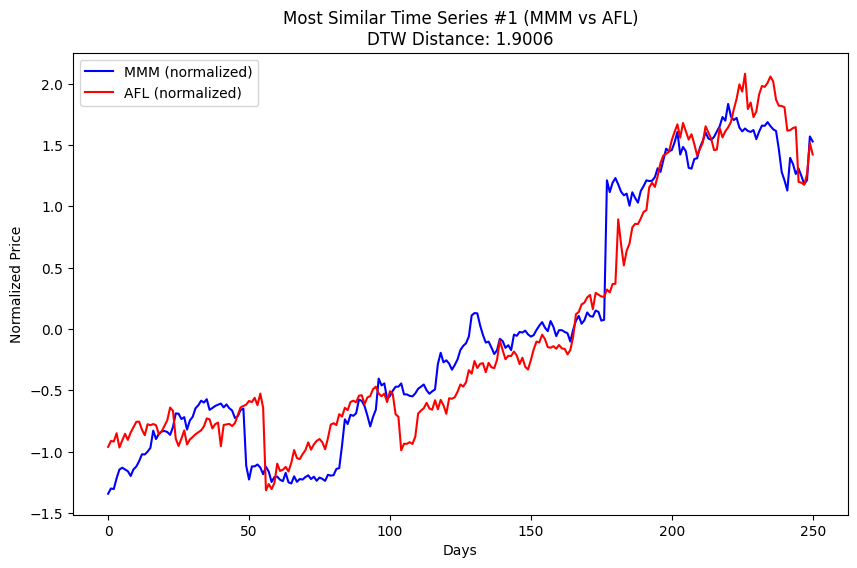

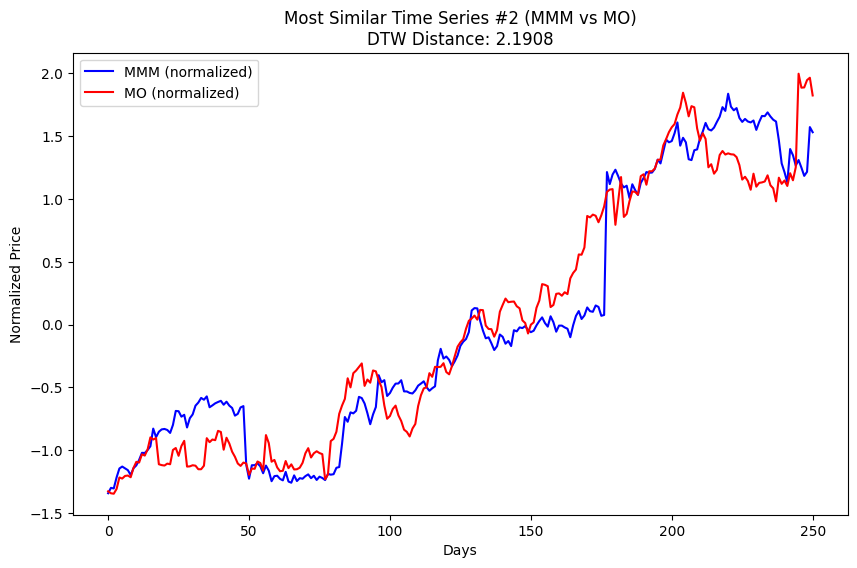

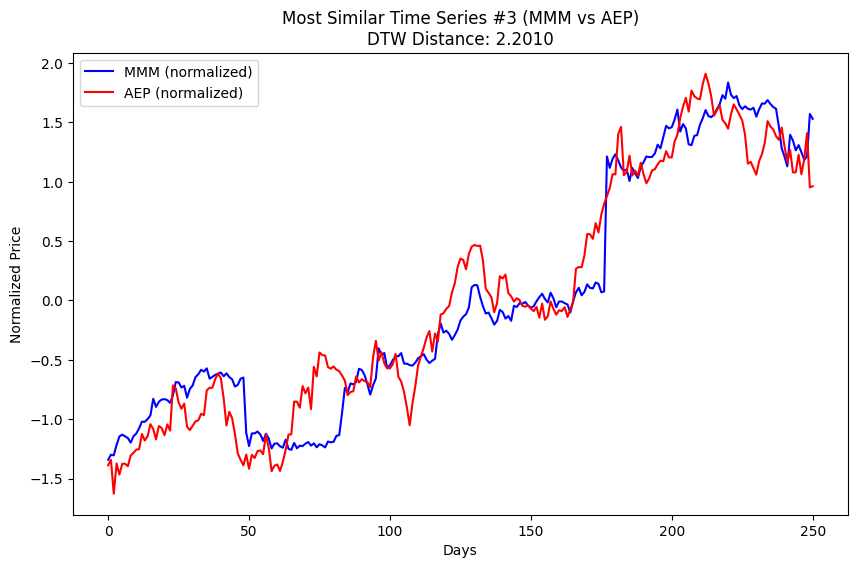

Most Similar Pair #1: MMM and AFL with DTW distance: 1.9006
Most Similar Pair #2: MMM and MO with DTW distance: 2.1908
Most Similar Pair #3: MMM and AEP with DTW distance: 2.2010


In [51]:
from dtaidistance import dtw
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler for normalization
scaler = StandardScaler()

# Function to calculate the most similar time series
def get_most_similar_series(tickers, all_data, top_n=1):
    dtw_distances = []
    
    # Calculate DTW distance for each pair of time series
    for i, ticker1 in enumerate(tickers[:40]):
        for j, ticker2 in enumerate(tickers[:40]):
            if i < j:  # Only calculate once per pair (avoid duplicate calculations)
                # Get the data for the pair of tickers
                time_series1 = all_data[ticker1].iloc[:].values
                time_series2 = all_data[ticker2].iloc[:].values
                
                # Normalize the data for both time series before calculating DTW
                normalized_series1 = scaler.fit_transform(time_series1.reshape(-1, 1)).flatten()
                normalized_series2 = scaler.fit_transform(time_series2.reshape(-1, 1)).flatten()
                
                # Calculate DTW distance between the two normalized time series
                dtw_distance = dtw.distance(normalized_series1, normalized_series2)
                
                # Store the DTW distance and the pair of tickers
                dtw_distances.append((ticker1, ticker2, dtw_distance))
    
    # Sort by DTW distance (ascending) and select the top N
    dtw_distances = sorted(dtw_distances, key=lambda x: x[2])  # Sort by DTW distance (ascending)
    
    # Select top_n most similar pairs
    most_similar_pairs = dtw_distances[:top_n]
    
    return most_similar_pairs

# Example usage: Get the top 3 most similar time series
top_n = 3
most_similar_pairs = get_most_similar_series(tickers, all_data, top_n)

# Plot the most similar pairs
for i, (ticker1, ticker2, dtw_value) in enumerate(most_similar_pairs):
    time_series1 = all_data[ticker1].iloc[:].values
    time_series2 = all_data[ticker2].iloc[:].values
    
    # Normalize the data for plotting
    normalized_series1 = scaler.fit_transform(time_series1.reshape(-1, 1)).flatten()
    normalized_series2 = scaler.fit_transform(time_series2.reshape(-1, 1)).flatten()

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(normalized_series1, label=f"{ticker1} (normalized)", color='blue')
    plt.plot(normalized_series2, label=f"{ticker2} (normalized)", color='red')
    plt.title(f"Most Similar Time Series #{i+1} ({ticker1} vs {ticker2})\nDTW Distance: {dtw_value:.4f}")
    plt.xlabel("Days")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.show()

# Output the top N most similar pairs
for i, (ticker1, ticker2, dtw_value) in enumerate(most_similar_pairs):
    print(f"Most Similar Pair #{i+1}: {ticker1} and {ticker2} with DTW distance: {dtw_value:.4f}")


# Plany

In [ ]:
for liczbka klastrów:
    cała magia (treningowym)

    silhouette + walidacyjny
    magia z accuracy
    
max(silhouette) <- dobra liczba klastrów
na testowym


to do:
Przekształcenia
- DTW (done)
- Próbkowanie
- Wektor statystyk
Klasteryzacje:
- K-średnich
- Medoidy (??)
Jeśli jest to nie trzeba tych entropii.

Accuracy:
- używamy otrzymanych klastrów -> klasyfikacja do klastra
- kolejno dorzucamy tę samą obserwacje do klastrów i sprawdzamy score (entropia coś)